# Simple Classification from "The Iris Dataset"

We are going to try to classify what species an iris flower is based on some measurements on the sepals and the petals. This is a pretty famous dataset that originated from R.A. Fisher in 1936.

Here's what we are going to do:

* Load in the dataset from a csv
* Take a peek at the data (what's in our dataset?)
* Look at the distributions of the fields
* How well can we classify using simple logic?
* Can we do better? (try KNN model)

In [1]:
# Import some required packages:

import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length'])

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_width,petal_length
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df['species'] = iris.target

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_width,petal_length,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Histograms

Let's take a look at how well our species are seperated by some of our measurements

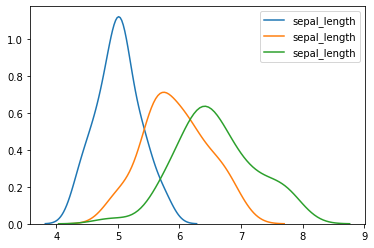

In [7]:
sns.kdeplot(iris_df[iris_df['species']==0]['sepal_length'])
sns.kdeplot(iris_df[iris_df['species']==1]['sepal_length'])
sns.kdeplot(iris_df[iris_df['species']==2]['sepal_length'])

Hmmm...notice how each of our curves are overlapping? That means it will be pretty tricky to accurately seperate our iris species based on sepal length alone.

Let's take a look at the histograms for petal width instead:

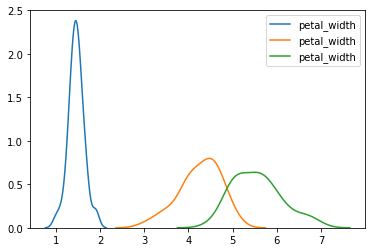

In [8]:
sns.kdeplot(iris_df[iris_df['species']==0]['petal_width'])
sns.kdeplot(iris_df[iris_df['species']==1]['petal_width'])
sns.kdeplot(iris_df[iris_df['species']==2]['petal_width'])

Now we can see that the blue curve (for species 0) is completely seperated from the other curves, and there is far less overlap with species 1 and 2. This is looking much better for being able to classify our species accurately!

# Build a simple model to classify

Looking at the histogram above, we can see that if the flower's petal width is under 2, that it belongs to species 0. We can also try to split between species 1 and 2...it looks like if it's above 5, that classifying it as species 2 is a good starting point.

So, now your task is to build some logic to classify some irises based only on their petal widths!

Remeber, we have three species we need to classify:

* **Species 0:** petal width <= 2

* **Species 1:** petal width > 2 _and_ petal width < 5

* **Species 2:** petal width >= 5

Now that we have seen how to use `if`, `elif`, and `else` statements, let's put those skills to the test and write a function with an if block to classify our irises!

In [9]:
# Let's start by defining our custom function:
def petal_width_class(petal_width):
    # now we put in our if statements...I'll do the first one for us:
    if petal_width <= 2:
        return 0
    # ... now you finish our function!

    
    
    

In [10]:
# test our function:
print(petal_width_class(1.5)) # should print 0
print(petal_width_class(3.7)) # should print 1
print(petal_width_class(6.4)) # should print 2

0
None
None


If your function is correct we can now apply it to all of the data in our Data Frame and see how accurately we have predicted each species based only on the petal width measurement.

Thankfully we can use the `apply` method available in Pandas, so not much coding required here!

In [71]:
petal_width_preds = iris_df['petal_width'].apply(petal_width_class)

# Take a peek at the first 5 predictions:
petal_width_preds[0:5]

0    0
1    0
2    0
3    0
4    0
Name: petal_width, dtype: int64

Now we need to score how well our classifier is working. So we have to compare our predicted value to the actual species value. For this example, we can use a simple metric like `accuracy_score` that we already imported from `scikit learn` in the first cell above.

In [72]:
accuracy_score(iris_df['species'], petal_width_preds)

0.9533333333333334

# How well did your classifier work?

Just using one measurement with some values we "eyeballed" we get predictions that give us over 93% accuracy.

Nice work!

Feel free to change the cutoff values in your function and see how it impacts the accuracy of your model. 

**Can you get the accuracy any higher?**

------------

# - OPTIONAL -

# Advanced model

Although the model we just wrote with some simple logic did pretty well, we can always do better!

What if we took into account *all* of the measurements in our data set? What about some other classification methods that we can use to account for this extra data?

A common classification algorithm is kNN *(or k-Nearest Neighbors)*. this approach tries to split the clusters of data into seperate groups. Read more about kNN [here](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn).

In a nutshell, we take some data with known species, then when we look at unclassified data we ask what species it's closest neighbors are and assign a species to the unknown data point.

# Scatterplots

Before we get too far along, let's take a look at how adding more information can help us with classifying some of those "edge cases" from above.

We can do this using a couple of scatterplots with a couple of measurements plotted against one-another:

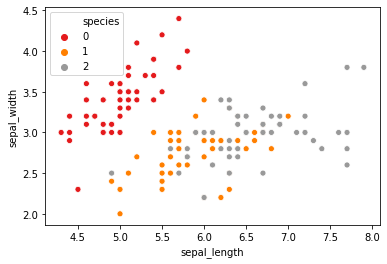

In [38]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df, palette='Set1')

Notice how when we plot sepal width along with sepal length, that we can see that species 0 is now sperating as a more distinct cluster?

Using this extra information allows use to make better boundaries on how we clssify each iris.

We can do the same thing with our two petal measurements:

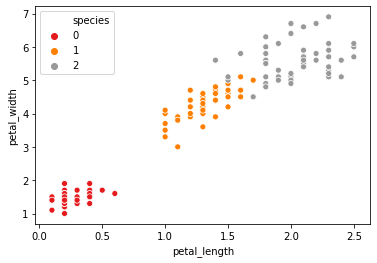

In [39]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_df, palette='Set1')

# Building our kNN Model

Now let's use all the measurements to build our kNN classifier!

First things first, we need to split our data set into a `training` set *(which we will use to train our model)* and a `hold-out` or `test` set *(which we hold aside and use only to evaluate how well our model performed)*.

In [78]:
# Split data into a training set and a test set:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [79]:
# Instatiate our model Class:
knn = KNeighborsClassifier(n_neighbors=3)

# Train our classifier:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [80]:
# Now we have a model, so let's make some predictions using our `test` data:
preds = pd.DataFrame()
preds['prediction'] = knn.predict(X_test)
preds['actual'] = list(y_test)

preds[0:10]

,prediction,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,2,2
6,1,1
7,1,1
8,1,1
9,2,2


Looking pretty good! 

But, let's check our accuracy for our test data:

In [75]:
accuracy_score(preds['actual'], preds['prediction'])

1.0

This means that by incorperating all of our data, and using the kNN algorithm we have gotten *perfect* predictions on our test set of data!

Not too shabby...

What if we want a little more context on our predictions? For example, we may want to know how confident our model was in the prediction.

Good news! We can have `scikit learn` give back probabilities for each class rather than just what class it predicts. Now we get more information about where our model is super confident in its predicted class as opposed to when the probability is split across each class!

In [77]:
probas = knn.predict_proba(X_test)
preds['proba_0'] = [x[0] for x in probas]
preds['proba_1'] = [x[1] for x in probas]
preds['proba_2'] = [x[2] for x in probas]

preds[0:10]

,prediction,actual,proba_0,proba_1,proba_2
0,0,0,1.0,0.000000,0.000000
1,1,1,0.0,1.000000,0.000000
2,1,1,0.0,1.000000,0.000000
3,2,2,0.0,0.000000,1.000000
4,1,1,0.0,0.666667,0.333333
5,2,2,0.0,0.000000,1.000000
6,2,2,0.0,0.000000,1.000000
7,1,1,0.0,1.000000,0.000000
8,2,2,0.0,0.000000,1.000000
9,1,1,0.0,1.000000,0.000000


Congratulations! You have built your first Machine Learning model to classify species of irises based on a few measurements of the flower's characteristics.

You will see this type of work done on lots of different kinds of data...you can also use the wine dataset built into `scikit learn` as well!

```
from sklearn.datasets import load_wine
data = load_wine()
```

Thanks for coming out and go science some data!